In [1]:
import torch
import matplotlib.pyplot as plt
from utils.Linear_GAN_utils import *

2022-12-21 15:24:20.550230: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-21 15:24:20.550287: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def show_images(data, n_samples):

    plt.figure(figsize=(8,2))

    for i in range(n_samples):
        image = data[i][0].reshape(8, 8)
        plt.subplot(1,n_samples,i+1)
        plt.axis('off')
        plt.imshow(image.numpy(), cmap='gray')
        
    plt.show()

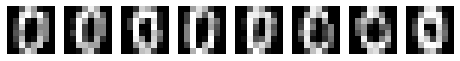

In [3]:
# Showing real data

digits = datasets.load_digits()

x_train = digits.data
y_train = digits.target

x_train = x_train.reshape(len(x_train), 8, 8)
x_train.shape

rd, real_data = resize_data(x_train, y_train, label = (0,), image_size = 8)
show_images(rd, 8)

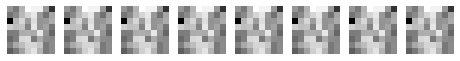

(None, torch.Size([1, 8, 8]))

In [9]:


synthetic = torch.load('torch_results/GAN/GAN_linear/20221221-151922/synthetic.pt')

model = torch.load('torch_results/GAN/GAN_linear/20221221-151922/conv_gen_epoch_100')   # '0' features
#model = torch.load('torch_results/GAN/GAN_linear/20221219-092917/gen_epoch_1500') # '0','1' features
#model = torch.load('torch_results/GAN/GAN_linear/20221219-100153/gen_epoch_2000')  # '0','1','2' features
model.eval()

GAN_imgs = []

fixed_noise = torch.rand(1, 5) 
for i in range(len(real_data)):      
     
    image = model(fixed_noise).view(1,8,8).cpu().detach()
    GAN_imgs.append(image)

show_images(GAN_imgs, 8), GAN_imgs[0].shape